In [1]:
import pandas as pd
df = pd.read_csv('df_comp12.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
df.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
0,0,Judy Biggert,House,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2009-12-11,3000.0,Republican,Incumbent
1,1,Geoff Davis,House,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2009-09-30,5000.0,Republican,Incumbent
2,2,Peter Roskam,House,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2009-12-11,5000.0,Republican,Incumbent
3,3,Henry Cuellar,House,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2009-06-30,-1000.0,Democratic,Incumbent
4,4,Kirk Morris,House,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2009-03-02,5000.0,Republican,NaN


In [59]:
#Reduce to Senate
df = df[df['RecipientCommitteeType'].str.contains('Senate', case=False)]

In [60]:
df.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
7,7,Mark Kirk,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2010-02-20,5000.0,Republican,Open Seat
19,19,Richard Shelby,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2010-02-20,1000.0,Republican,Incumbent
23,23,John Thune,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2010-02-20,2500.0,Republican,Incumbent
24,24,David Vitter,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2010-02-20,2500.0,Republican,Incumbent
29,29,Richard Burr,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2010-02-20,2500.0,Republican,Incumbent


In [61]:
#Break out the groups filtered by DonorCommitteeNameNormalized first. 
#Create features (columns) for each, then join to 2018 Spreadsheet of candidates
df['DonorOrganization'].isna().sum()

3

In [62]:
#Drop rows without value for DonorCommittee
df = df.dropna(subset=['DonorOrganization'])
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
7,Mark Kirk,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2010-02-20,5000.0,Republican,Open Seat
19,Richard Shelby,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2010-02-20,1000.0,Republican,Incumbent
23,John Thune,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2010-02-20,2500.0,Republican,Incumbent
24,David Vitter,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2010-02-20,2500.0,Republican,Incumbent
29,Richard Burr,Senate,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,Illinois Tool Works,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,0,NaN,NaN,2010-02-20,2500.0,Republican,Incumbent


In [63]:
df_Chevron = df[df['DonorOrganization'].str.contains('chevron', case=False)]
df_Chevron

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
63271,Evan Bayh,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2009-01-12,1000.0,Democratic,Incumbent
63273,Gordon Smith,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2009-02-17,-1000.0,Republican,NaN
63277,Charles Melancon,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2009-04-16,1500.0,Democratic,Challenger
63288,Richard Burr,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2009-04-16,1000.0,Republican,Incumbent
63292,Blanche Lincoln,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2009-04-24,2000.0,Democratic,Incumbent
63298,Lisa Murkowski,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2009-06-11,4000.0,Republican,Incumbent
63300,Jim Demint,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2009-06-11,1500.0,Republican,Incumbent
63302,Lisa Murkowski,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2009-06-11,1500.0,Republican,Incumbent
63303,Charles Melancon,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2009-06-11,1000.0,Democratic,Challenger
63304,Lisa Murkowski,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2009-06-11,1000.0,Republican,Incumbent


In [64]:
df_Chevron['TransactionAmount'].sum()
#About 70% of all Congressional donations

332170.0

In [65]:
# get dataframe linking name to total donations by koch
namegroups = df_Chevron.groupby('RecipientCandidateNameNormalized')
df_Chevron_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [66]:
# rename column
df_Chevron_Senate = df_Chevron_Senate.rename(index=str, columns={"TransactionAmount": "Chevron10"})
df_Chevron_Senate

,Chevron10
RecipientCandidateNameNormalized,
Thomas Coburn,10000.0
Sharron E Angle,750.0
Scott P Brown,1500.0
Roy Blunt,11250.0
Roger Wicker,-1500.0
Robert Bennett,19600.0
Rob Portman,13750.0
Richard Shelby,2500.0
Richard Burr,14970.0


In [67]:
df_Chevron_Senate['Chevron10'].sum()

332170.0

In [68]:
df_Chevron_Senate.shape

(48, 1)

In [69]:
df_senate = pd.read_excel('senate_env13_10con.xlsx')
df_senate.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Arch10,Cloud10,Drummond10,Lignite10,NAcoal10,OHcoal10,Peabody10,Barrick10,Cliffs10,Newmont10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,4000,0,0,0,0,0,4500,15000,0,3500
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,1000,0,0,0,0,0,0,1000,0,1000
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,3500,0,7000,0,0,0,0,0,0,0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0,0,500,0,0,0,0,0,0,0


In [70]:
# check if senators appear more than once
(df_senate.RecipientCandidateNameNormalized.value_counts()>1).any()

False

In [71]:
result = pd.merge(df_senate, df_Chevron_Senate, how='left', on='RecipientCandidateNameNormalized')
result['Chevron10']=result['Chevron10'].fillna(0)
result.tail(51)

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Cloud10,Drummond10,Lignite10,NAcoal10,OHcoal10,Peabody10,Barrick10,Cliffs10,Newmont10,Chevron10
49,Senate,MS,Thad Cochran,Republican,NaN,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
50,Senate,MT,Jon Tester,Democratic,NaN,92,0,0,0,0,...,1000,0,0,0,0,0,0,0,0,0.0
51,Senate,MT,Max Baucus,Democratic,NaN,85,0,0,0,0,...,0,0,0,0,0,1000,0,0,0,2400.0
52,Senate,NC,Kay R Hagan,Democratic,NaN,85,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
53,Senate,NC,Richard Burr,Republican,NaN,15,10000,0,11000,0,...,0,1000,0,0,0,3000,0,0,0,14970.0
54,Senate,ND,Heidi Heitkamp,Democratic,Open Seat,69,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
55,Senate,ND,John Hoeven,Republican,NaN,23,10000,0,10000,0,...,0,0,8000,5000,250,7000,0,0,2000,10000.0
56,Senate,NE,Debra S Fischer,Republican,Open Seat,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
57,Senate,NE,Michael O Johanns,Republican,NaN,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
58,Senate,NH,Jeanne Shaheen,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [72]:
result['Chevron10'].sum()
#About 80% of Koch's Senate donations in the 2016 cycle went towards candidates who won/ remained in Senate
#Notable losers were ...

256620.0

In [73]:
result['Chevron10'].where(result['Chevron10'] > 0).count()
#19 of the 24 candidates they donated to won/ remained in Senate

30

In [74]:
#STEWART & STEVENSON
df_stewart = df[df['DonorOrganization'].str.contains('Stewart & Stevenson', case=False)]
print('Stewart & Stevenson Total 2010 Senate donations: ', df_stewart['TransactionAmount'].sum())
# get dataframe linking name to total donations by Stewart
namegroups = df_stewart.groupby('RecipientCandidateNameNormalized')
df_stewart_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_stewart_Senate = df_stewart_Senate.rename(index=str, columns={"TransactionAmount": "stewart10"})
print('Checking Sums after grouping: ', df_stewart_Senate['stewart10'].sum())
print('Candidates Stewart donated to: ', df_stewart_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result, df_stewart_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['stewart10']=result2['stewart10'].fillna(0)
result2

Stewart & Stevenson Total 2010 Senate donations:  19200.0
Checking Sums after grouping:  19200.0
Candidates Stewart donated to:  (6, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Drummond10,Lignite10,NAcoal10,OHcoal10,Peabody10,Barrick10,Cliffs10,Newmont10,Chevron10,stewart10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,0,0,0,0,4500,15000,0,3500,13900.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,0,0,0,0,0,1000,0,1000,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,7000,0,0,0,0,0,0,0,2500.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,500,0,0,0,0,0,0,0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,0,0,0,0,0,0,0,1000,10550.0,2400.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0,0,0,0,2400.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,0,0,0,0,0,0,0,0,2400.0,0.0


In [75]:
#CROWNQUEST
df_crown = df[df['DonorOrganization'].str.contains('Crownquest', case=False)]
print('Crownquest Total 2010 Senate donations: ', df_crown['TransactionAmount'].sum())
# get dataframe linking name to total donations by MarOil
namegroups = df_crown.groupby('RecipientCandidateNameNormalized')
df_crown_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_crown_Senate = df_crown_Senate.rename(index=str, columns={"TransactionAmount": "Crown10"})
print('Checking Sums after grouping: ', df_crown_Senate['Crown10'].sum())
print('Candidates Crownquest donated to: ', df_crown_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_crown_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Crown10']=result2['Crown10'].fillna(0)
result2

Crownquest Total 2010 Senate donations:  2750.0
Checking Sums after grouping:  2750.0
Candidates Crownquest donated to:  (2, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Lignite10,NAcoal10,OHcoal10,Peabody10,Barrick10,Cliffs10,Newmont10,Chevron10,stewart10,Crown10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,0,0,0,4500,15000,0,3500,13900.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,0,0,0,0,1000,0,1000,0.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,0,0,0,0,0,0,0,2500.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,0,0,0,0,0,0,1000,10550.0,2400.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0,0,0,2400.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,0,0,0,0,0,0,0,2400.0,0.0,0.0


In [76]:
#PILOT CORP
df_pilot = df[df['DonorOrganization'].str.contains('Pilot Corp', case=True)]
print('Pilot Corp Total 2010 Senate donations: ', df_pilot['TransactionAmount'].sum())
# get dataframe linking name to total donations by Pilot
namegroups = df_pilot.groupby('RecipientCandidateNameNormalized')
df_pilot_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_pilot_Senate = df_pilot_Senate.rename(index=str, columns={"TransactionAmount": "Pilot10"})
print('Checking Sums after grouping: ', df_pilot_Senate['Pilot10'].sum())
print('Candidates Pilot Corp donated to: ', df_pilot_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_pilot_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Pilot10']=result2['Pilot10'].fillna(0)
result2

Pilot Corp Total 2010 Senate donations:  14800.0
Checking Sums after grouping:  14800.0
Candidates Pilot Corp donated to:  (4, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,NAcoal10,OHcoal10,Peabody10,Barrick10,Cliffs10,Newmont10,Chevron10,stewart10,Crown10,Pilot10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,0,0,4500,15000,0,3500,13900.0,0.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,0,0,0,1000,0,1000,0.0,0.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,0,0,0,0,0,0,2500.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,0,0,0,0,0,1000,10550.0,2400.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0,0,2400.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,0,0,0,0,0,0,2400.0,0.0,0.0,0.0


In [77]:
#Berexco
df_Berex = df[df['DonorOrganization'].str.contains('Berexco', case=False)]
print('Berexco Total 2010 Senate donations: ', df_Berex['TransactionAmount'].sum())
# get dataframe linking name to total donations by Berexco
namegroups = df_Berex.groupby('RecipientCandidateNameNormalized')
df_Berex_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Berex_Senate = df_Berex_Senate.rename(index=str, columns={"TransactionAmount": "Berex10"})
print('Checking Sums after grouping: ', df_Berex_Senate['Berex10'].sum())
print('Candidates Berexco donated to: ', df_Berex_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Berex_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Berex10']=result2['Berex10'].fillna(0)
result2

Berexco Total 2010 Senate donations:  25100.0
Checking Sums after grouping:  25100.0
Candidates Berexco donated to:  (12, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,OHcoal10,Peabody10,Barrick10,Cliffs10,Newmont10,Chevron10,stewart10,Crown10,Pilot10,Berex10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,0,4500,15000,0,3500,13900.0,0.0,0.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,0,0,1000,0,1000,0.0,0.0,0.0,0.0,2500.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,0,0,0,0,0,2500.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,0,0,0,0,1000,10550.0,2400.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0,2400.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,0,0,0,0,0,2400.0,0.0,0.0,0.0,0.0


In [78]:
#Continental Resources
df_Cont = df[df['DonorOrganization'].str.contains('continental resources', case=False)]
print('Continental Resources Total 2010 Senate donations: ', df_Cont['TransactionAmount'].sum())
# get dataframe linking name to total donations by Cont
namegroups = df_Cont.groupby('RecipientCandidateNameNormalized')
df_Cont_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Cont_Senate = df_Cont_Senate.rename(index=str, columns={"TransactionAmount": "Cont10"})
print('Checking Sums after grouping: ', df_Cont_Senate['Cont10'].sum())
print('Candidates Continental donated to: ', df_Cont_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Cont_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Cont10']=result2['Cont10'].fillna(0)
result2

Continental Resources Total 2010 Senate donations:  104100.0
Checking Sums after grouping:  104100.0
Candidates Continental donated to:  (23, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Peabody10,Barrick10,Cliffs10,Newmont10,Chevron10,stewart10,Crown10,Pilot10,Berex10,Cont10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,4500,15000,0,3500,13900.0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,0,1000,0,1000,0.0,0.0,0.0,0.0,2500.0,2400.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,0,0,0,0,2500.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2400.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,0,0,0,1000,10550.0,2400.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,2400.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,0,0,0,0,2400.0,0.0,0.0,0.0,0.0,0.0


In [79]:
#Edison Chouest
df_Edison = df[df['DonorOrganization'].str.contains('Edison Chouest', case=False)]
print('Edison Chouest Total 2010 Senate donations: ', df_Edison['TransactionAmount'].sum())
# get dataframe linking name to total donations by Edison
namegroups = df_Edison.groupby('RecipientCandidateNameNormalized')
df_Edison_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Edison_Senate = df_Edison_Senate.rename(index=str, columns={"TransactionAmount": "Edison10"})
print('Checking Sums after grouping: ', df_Edison_Senate['Edison10'].sum())
print('Candidates Edison Chouest donated to: ', df_Edison_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Edison_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Edison10']=result2['Edison10'].fillna(0)
result2

Edison Chouest Total 2010 Senate donations:  50750.0
Checking Sums after grouping:  50750.0
Candidates Edison Chouest donated to:  (3, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Barrick10,Cliffs10,Newmont10,Chevron10,stewart10,Crown10,Pilot10,Berex10,Cont10,Edison10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,15000,0,3500,13900.0,0.0,0.0,0.0,0.0,0.0,33850.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,1000,0,1000,0.0,0.0,0.0,0.0,2500.0,2400.0,2400.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,0,0,0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2400.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,0,0,1000,10550.0,2400.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,0,0,0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,0,0,0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
#OTIS EASTERN
df_Otis = df[df['DonorOrganization'].str.contains('otis eastern', case=False)]
print('Otis Eastern Total 2010 Senate donations: ', df_Otis['TransactionAmount'].sum())
# get dataframe linking name to total donations by Otis
namegroups = df_Otis.groupby('RecipientCandidateNameNormalized')
df_Otis_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Otis_Senate = df_Otis_Senate.rename(index=str, columns={"TransactionAmount": "Otis10"})
print('Checking Sums after grouping: ', df_Otis_Senate['Otis10'].sum())
print('Candidates Otis Eastern donated to: ', df_Otis_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Otis_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Otis10']=result2['Otis10'].fillna(0)
result2

Otis Eastern Total 2010 Senate donations:  250.0
Checking Sums after grouping:  250.0
Candidates Otis Eastern donated to:  (1, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Cliffs10,Newmont10,Chevron10,stewart10,Crown10,Pilot10,Berex10,Cont10,Edison10,Otis10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,0,3500,13900.0,0.0,0.0,0.0,0.0,0.0,33850.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,0,1000,0.0,0.0,0.0,0.0,2500.0,2400.0,2400.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,0,0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,2400.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,0,1000,10550.0,2400.0,0.0,0.0,0.0,0.0,0.0,250.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,0,0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,0,0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
#ALLIANCE COAL
df_AllCoal = df[df['DonorOrganization'].str.contains('alliance coal', case=False)]
print('Alliance Coal Total 2010 Senate donations: ', df_AllCoal['TransactionAmount'].sum())
# get dataframe linking name to total donations by Alliance
namegroups = df_AllCoal.groupby('RecipientCandidateNameNormalized')
df_AllCoal_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_AllCoal_Senate = df_AllCoal_Senate.rename(index=str, columns={"TransactionAmount": "AllCoal10"})
print('Checking Sums after grouping: ', df_AllCoal_Senate['AllCoal10'].sum())
print('Candidates Alliance Coal donated to: ', df_AllCoal_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_AllCoal_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['AllCoal10']=result2['AllCoal10'].fillna(0)
result2

Alliance Coal Total 2010 Senate donations:  192300.0
Checking Sums after grouping:  192300.0
Candidates Alliance Coal donated to:  (25, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Newmont10,Chevron10,stewart10,Crown10,Pilot10,Berex10,Cont10,Edison10,Otis10,AllCoal10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,3500,13900.0,0.0,0.0,0.0,0.0,0.0,33850.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,1000,0.0,0.0,0.0,0.0,2500.0,2400.0,2400.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,2400.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,1000,10550.0,2400.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#ALLIANCE RESOURCE
df_AllRes = df[df['DonorOrganization'].str.contains('alliance resource', case=False)]
print('Alliance Resource Total 2010 Senate donations: ', df_AllRes['TransactionAmount'].sum())
# get dataframe linking name to total donations by Alliance
namegroups = df_AllRes.groupby('RecipientCandidateNameNormalized')
df_AllRes_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_AllRes_Senate = df_AllRes_Senate.rename(index=str, columns={"TransactionAmount": "AllRes10"})
print('Checking Sums after grouping: ', df_AllRes_Senate['AllRes10'].sum())
print('Candidates Alliance Resource donated to: ', df_AllRes_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_AllRes_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['AllRes10']=result2['AllRes10'].fillna(0)
result2

Alliance Resource Total 2010 Senate donations:  21400.0
Checking Sums after grouping:  21400.0
Candidates Alliance Resource donated to:  (9, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Chevron10,stewart10,Crown10,Pilot10,Berex10,Cont10,Edison10,Otis10,AllCoal10,AllRes10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,13900.0,0.0,0.0,0.0,0.0,0.0,33850.0,0.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,0.0,0.0,0.0,0.0,2500.0,2400.0,2400.0,0.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,2400.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,10550.0,2400.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
#MURRAY ENERGY
df_Murray = df[df['DonorOrganization'].str.contains('murray energy', case=False)]
print('Murray Energy Total 2010 Senate donations: ', df_Murray['TransactionAmount'].sum())
# get dataframe linking name to total donations by Murray
namegroups = df_Murray.groupby('RecipientCandidateNameNormalized')
df_Murray_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Murray_Senate = df_Murray_Senate.rename(index=str, columns={"TransactionAmount": "Murray10"})
print('Checking Sums after grouping: ', df_Murray_Senate['Murray10'].sum())
print('Candidates Murray Energy donated to: ', df_Murray_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Murray_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Murray10']=result2['Murray10'].fillna(0)
result2

Murray Energy Total 2010 Senate donations:  239631.0
Checking Sums after grouping:  239631.0
Candidates Murray Energy donated to:  (26, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,stewart10,Crown10,Pilot10,Berex10,Cont10,Edison10,Otis10,AllCoal10,AllRes10,Murray10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,0.0,0.0,0.0,0.0,0.0,33850.0,0.0,0.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,0.0,0.0,0.0,2500.0,2400.0,2400.0,0.0,0.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,9945.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0.0,0.0,0.0,0.0,2400.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,2400.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
#NATIONAL MINING
df_NatMin = df[df['DonorOrganization'].str.contains('national mining', case=False)]
print('National Mining Total 2010 Senate donations: ', df_NatMin['TransactionAmount'].sum())
# get dataframe linking name to total donations by National Mining
namegroups = df_NatMin.groupby('RecipientCandidateNameNormalized')
df_NatMin_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_NatMin_Senate = df_NatMin_Senate.rename(index=str, columns={"TransactionAmount": "NatMin10"})
print('Checking Sums after grouping: ', df_NatMin_Senate['NatMin10'].sum())
print('Candidates National Mining donated to: ', df_NatMin_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_NatMin_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['NatMin10']=result2['NatMin10'].fillna(0)
result2

National Mining Total 2010 Senate donations:  175500.0
Checking Sums after grouping:  175500.0
Candidates National Mining donated to:  (37, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Crown10,Pilot10,Berex10,Cont10,Edison10,Otis10,AllCoal10,AllRes10,Murray10,NatMin10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,0.0,0.0,0.0,0.0,33850.0,0.0,0.0,0.0,0.0,7000.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,0.0,0.0,2500.0,2400.0,2400.0,0.0,0.0,0.0,0.0,2000.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,9945.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0.0,0.0,0.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,5000.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
#FREEPORT MCMORAN
df_FreeMc = df[df['DonorOrganization'].str.contains('freeport mcmoran', case=False)]
print('Freeport McMoran Total 2010 Senate donations: ', df_FreeMc['TransactionAmount'].sum())
# get dataframe linking name to total donations by Freeport
namegroups = df_FreeMc.groupby('RecipientCandidateNameNormalized')
df_FreeMc_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_FreeMc_Senate = df_FreeMc_Senate.rename(index=str, columns={"TransactionAmount": "FreeMc10"})
print('Checking Sums after grouping: ', df_FreeMc_Senate['FreeMc10'].sum())
print('Candidates Freeport McMoran donated to: ', df_FreeMc_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_FreeMc_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['FreeMc10']=result2['FreeMc10'].fillna(0)
result2

Freeport McMoran Total 2010 Senate donations:  230300.0
Checking Sums after grouping:  230300.0
Candidates Freeport McMoran donated to:  (43, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch10,MarPet10,MarOil10,EnTrans10,...,Pilot10,Berex10,Cont10,Edison10,Otis10,AllCoal10,AllRes10,Murray10,NatMin10,FreeMc10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,9000,0,5000,9800,...,0.0,0.0,0.0,33850.0,0.0,0.0,0.0,0.0,7000.0,5000.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,2000,0,...,0.0,2500.0,2400.0,2400.0,0.0,0.0,0.0,0.0,2000.0,2000.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,10000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,9945.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0,0,...,0.0,0.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,0,0,...,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,5000.0,38050.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0


In [86]:
result2.to_excel('senate_env13_10con.xlsx')

In [87]:
result = pd.read_excel('senate_env13_10pro.xlsx')
result

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV10,Sierra10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,0,0
1,Senate,AK,Mark Begich,Democratic,NaN,77,500,0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,0,0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,67468,1340
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0


In [88]:
#NATURE CONSERVANCY
df_Nature = df[df['DonorOrganization'].str.contains('nature conservancy', case=False)]
print('Nature Conservancy Total 2010 Senate donations: ', df_Nature['TransactionAmount'].sum())
# get dataframe linking name to total donations by NC
namegroups = df_Nature.groupby('RecipientCandidateNameNormalized')
df_Nature_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Nature_Senate = df_Nature_Senate.rename(index=str, columns={"TransactionAmount": "Nature10"})
print('Checking Sums after grouping: ', df_Nature_Senate['Nature10'].sum())
print('Nature Conservancy donated to: ', df_Nature_Senate.shape)
# merging with earlier spreadsheet
result = pd.merge(result, df_Nature_Senate, how='left', on='RecipientCandidateNameNormalized')
result['Nature10']=result['Nature10'].fillna(0)
result

Nature Conservancy Total 2010 Senate donations:  14450.0
Checking Sums after grouping:  14450.0
Nature Conservancy donated to:  (17, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV10,Sierra10,Nature10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,0,0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,500,0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,0,0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,500.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,67468,1340,250.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0.0


In [89]:
#ENVIRONMENTAL DEFENSE FUND
df_EDF = df[df['DonorOrganization'].str.contains('environmental defense', case=False)]
print('Environmental Defense Fund Total 2010 Senate donations: ', df_EDF['TransactionAmount'].sum())
# get dataframe linking name to total donations by EDF
namegroups = df_EDF.groupby('RecipientCandidateNameNormalized')
df_EDF_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_EDF_Senate = df_EDF_Senate.rename(index=str, columns={"TransactionAmount": "EDF10"})
print('Checking Sums after grouping: ', df_EDF_Senate['EDF10'].sum())
print('EDF donated to: ', df_EDF_Senate.shape)
# merging with earlier spreadsheet
result = pd.merge(result, df_EDF_Senate, how='left', on='RecipientCandidateNameNormalized')
result['EDF10']=result['EDF10'].fillna(0)
result

Environmental Defense Fund Total 2010 Senate donations:  12350.0
Checking Sums after grouping:  12350.0
EDF donated to:  (9, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV10,Sierra10,Nature10,EDF10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,0,0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,500,0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,0,0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,500.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,67468,1340,250.0,1000.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0.0,0.0


In [90]:
#GLOBAL GREEN USA
df_GloGreen = df[df['DonorOrganization'].str.contains('global green usa', case=False)]
print('Global Green USA Total 2010 Senate donations: ', df_GloGreen['TransactionAmount'].sum())
# get dataframe linking name to total donations by GloGreen
namegroups = df_GloGreen.groupby('RecipientCandidateNameNormalized')
df_GloGreen_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_GloGreen_Senate = df_GloGreen_Senate.rename(index=str, columns={"TransactionAmount": "GloGreen10"})
print('Checking Sums after grouping: ', df_GloGreen_Senate['GloGreen10'].sum())
print('GloGreen donated to: ', df_GloGreen_Senate.shape)
# merging with earlier spreadsheet
result = pd.merge(result, df_GloGreen_Senate, how='left', on='RecipientCandidateNameNormalized')
result['GloGreen10']=result['GloGreen10'].fillna(0)
result

Global Green USA Total 2010 Senate donations:  1900.0
Checking Sums after grouping:  1900.0
GloGreen donated to:  (3, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV10,Sierra10,Nature10,EDF10,GloGreen10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,0,0,0.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,500,0,0.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,0,0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,500.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,67468,1340,250.0,1000.0,1150.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0.0,0.0,0.0


In [91]:
#ENVIRONMENT AMERICA
df_EnvAm = df[df['DonorOrganization'].str.contains('environment america', case=False)]
print('Global Green USA Total 2010 Senate donations: ', df_EnvAm['TransactionAmount'].sum())
# get dataframe linking name to total donations by EnvAm
namegroups = df_EnvAm.groupby('RecipientCandidateNameNormalized')
df_EnvAm_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_EnvAm_Senate = df_EnvAm_Senate.rename(index=str, columns={"TransactionAmount": "EnvAm10"})
print('Checking Sums after grouping: ', df_EnvAm_Senate['EnvAm10'].sum())
print('EnvAm donated to: ', df_EnvAm_Senate.shape)
# merging with earlier spreadsheet
result = pd.merge(result, df_EnvAm_Senate, how='left', on='RecipientCandidateNameNormalized')
result['EnvAm10']=result['EnvAm10'].fillna(0)
result

Global Green USA Total 2010 Senate donations:  250.0
Checking Sums after grouping:  250.0
EnvAm donated to:  (1, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV10,Sierra10,Nature10,EDF10,GloGreen10,EnvAm10
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,0,0,0.0,0.0,0.0,0.0
1,Senate,AK,Mark Begich,Democratic,NaN,77,500,0,0.0,0.0,0.0,0.0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,0,0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0.0,0.0,0.0,0.0
5,Senate,AR,Mark Pryor,Democratic,NaN,54,0,0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,23,0,0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,Incumbent,31,0,0,500.0,0.0,0.0,0.0
8,Senate,CA,Barbara Boxer,Democratic,NaN,100,67468,1340,250.0,1000.0,1150.0,0.0
9,Senate,CA,Dianne Feinstein,Democratic,Incumbent,92,0,0,0.0,0.0,0.0,0.0


In [92]:
result.to_excel('senate_env13_10pro.xlsx')

In [3]:
import pandas as pd 
df_env12 = pd.read_excel('senate_env13.xlsx')
df_env12.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Lisa Murkowski,Republican,NaN,38
1,Senate,AK,Mark Begich,Democratic,NaN,77
2,Senate,AL,Jefferson Sessions,Republican,NaN,15
3,Senate,AL,Richard Shelby,Democratic,NaN,23
4,Senate,AR,John Boozman,Republican,NaN,15


In [4]:
df_env12[df_env12['RecipientCandidateParty'].str.contains('Independent', case=False)]

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
40,Senate,ME,Angus Stanley King Jr,Independent,Open Seat,92
90,Senate,VT,Bernard Sanders,Independent,Open Seat,100


In [5]:
#df_env12(['RecipientCandidateParty']).str.replace('Independent', 'Democratic', regex=False)
df_env12 = df_env12.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df_env12.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Lisa Murkowski,Republican,NaN,38
1,Senate,AK,Mark Begich,Democratic,NaN,77
2,Senate,AL,Jefferson Sessions,Republican,NaN,15
3,Senate,AL,Richard Shelby,Democratic,NaN,23
4,Senate,AR,John Boozman,Republican,NaN,15


In [6]:
df_env18 = pd.read_excel('senate_env18.xlsx')
df_env18.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Dan Sullivan,Republican,NaN,7
1,Senate,AK,Lisa Murkowski,Republican,NaN,14
2,Senate,AL,Doug Jones,Democratic,NaN,79
3,Senate,AL,Richard Shelby,Republican,NaN,7
4,Senate,AR,John Boozman,Republican,NaN,7


In [7]:
df_env18 = df_env18.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df_env18.nunique()

RecipientCandidateOffice              1
RecipientCandidateOfficeState        50
RecipientCandidateNameNormalized    100
RecipientCandidateParty               2
RecipientCandidateICO                 3
LCV_Score                            12
dtype: int64

In [8]:
X12_Rep = [df_env12['LCV_Score'].values[df_env12['RecipientCandidateParty']=='Republican']]
len(X12_Rep[0])
X12_Rep = X12_Rep[0]

In [9]:
X12_Dem = [df_env12['LCV_Score'].values[df_env12['RecipientCandidateParty']=='Democratic']]
len(X12_Dem[0])
X12_Dem = X12_Dem[0]

In [10]:
X18_Rep = [df_env18['LCV_Score'].values[df_env18['RecipientCandidateParty']=='Republican']]
len(X18_Rep[0])
X18_Rep = X18_Rep[0]

In [11]:
X18_Dem = [df_env18['LCV_Score'].values[df_env18['RecipientCandidateParty']=='Democratic']]
len(X18_Dem[0])
X18_Dem = X18_Dem[0]

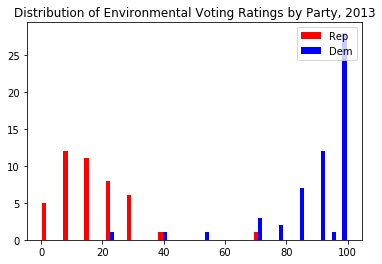

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#plt.hist(X12_Rep, 20, density=True, facecolor='r', alpha=0.75)
#fig, ax = plt.subplots()
#ax.scatter(x, y, c=z, s=100, edgecolor='')
#pyplot.hist(x, bins, alpha=0.5, label='x')
#pyplot.hist(y, bins, alpha=0.5, label='y')
#pyplot.legend(loc='upper right')
#pyplot.show()
bins = np.linspace(0, 100, 30)
colors = ['r','b']
plt.hist([X12_Rep, X12_Dem], bins, color=colors, label=['Rep', 'Dem'])
plt.title('Distribution of Environmental Voting Ratings by Party, 2013')
plt.legend(loc='upper right')
plt.show()

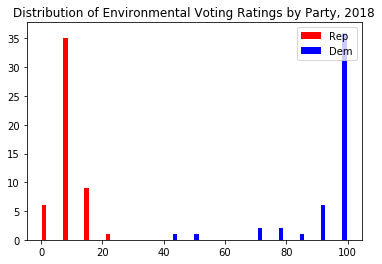

In [14]:
bins = np.linspace(0, 100, 30)
plt.hist([X18_Rep, X18_Dem], bins, color=colors, label=['Rep', 'Dem'])
plt.title('Distribution of Environmental Voting Ratings by Party, 2018')
plt.legend(loc='upper right')
plt.show()